In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F

In [2]:
tokenizer = AutoTokenizer.from_pretrained("pinkmanlove/llama-7b-hf")
model = AutoModelForCausalLM.from_pretrained("pinkmanlove/llama-7b-hf", torch_dtype = torch.bfloat16)

KeyboardInterrupt: 

In [27]:
def var_of_layer(layer):
    return torch.std(torch.concat([torch.flatten(x[1]) for x in list(layer.named_parameters())]))

In [40]:
def agg_of_layer(layer):
    return torch.sum(torch.concat([torch.abs(torch.flatten(x[1])) for x in list(layer.named_parameters())]))

In [59]:
def l2_of_layer(layer):
    return torch.linalg.vector_norm(torch.concat([torch.abs(torch.flatten(x[1])) for x in list(layer.named_parameters())]))

In [60]:
stds = []
aggs = []
l2 = []
for layer in model.base_model.layers:
    stds.append(var_of_layer(layer))
    aggs.append(agg_of_layer(layer))
    l2.append(l2_of_layer(layer))

In [78]:
def nuc_norm_of_layer(layer):
    return torch.tensor([torch.linalg.matrix_norm(x[1]) for x in list(layer.named_parameters()) if x[1].dim()>=2])

In [85]:
nuc = []
for layer in model.base_model.layers:
    nuc.append(float(torch.sum(nuc_norm_of_layer(layer))))

In [80]:
for std in nuc:
    print(float(std),end=', ')

804.0, 956.0, 1020.0, 996.0, 996.0, 984.0, 992.0, 996.0, 984.0, 1000.0, 996.0, 1000.0, 1004.0, 1000.0, 1004.0, 1004.0, 1004.0, 1004.0, 1000.0, 1000.0, 1004.0, 1004.0, 1004.0, 1008.0, 1000.0, 1008.0, 1008.0, 1008.0, 1008.0, 1012.0, 1012.0, 1012.0, 1016.0, 1016.0, 1024.0, 1016.0, 1016.0, 1020.0, 1020.0, 1004.0, 

In [61]:
for std in stds:
    print(float(std),end=', ')
print()
for agg in aggs:
    print(float(agg),end=', ')
print()
for agg in l2:
    print(float(agg),end=', ')

0.0179443359375, 0.0216064453125, 0.0228271484375, 0.0220947265625, 0.0220947265625, 0.0218505859375, 0.02197265625, 0.02197265625, 0.0218505859375, 0.0220947265625, 0.02197265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.022216796875, 0.0220947265625, 0.0220947265625, 0.022216796875, 0.022216796875, 0.022216796875, 0.0223388671875, 0.0223388671875, 0.0223388671875, 0.0223388671875, 0.0224609375, 0.0225830078125, 0.0224609375, 0.0224609375, 0.0224609375, 0.0225830078125, 0.0224609375, 
4161536.0, 5079040.0, 5472256.0, 5439488.0, 5439488.0, 5406720.0, 5406720.0, 5472256.0, 5406720.0, 5472256.0, 5472256.0, 5472256.0, 5505024.0, 5505024.0, 5505024.0, 5505024.0, 5537792.0, 5537792.0, 5505024.0, 5505024.0, 5537792.0, 5537792.0, 5537792.0, 5570560.0, 5537792.0, 5537792.0, 5570560.0, 5570560.0, 5570560.0, 5603328.0, 5570560.0, 560

In [ ]:
for std in stds:
    print(float(std),end=', ')
print()
for agg in aggs:
    print(float(agg),end=', ')

In [46]:
std_13b = [0.0179443359375, 0.0216064453125, 0.0228271484375, 0.0220947265625, 0.0220947265625, 0.0218505859375, 0.02197265625, 0.02197265625, 0.0218505859375, 0.0220947265625, 0.02197265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.0220947265625, 0.022216796875, 0.0220947265625, 0.0220947265625, 0.022216796875, 0.022216796875, 0.022216796875, 0.0223388671875, 0.0223388671875, 0.0223388671875, 0.0223388671875, 0.0224609375, 0.0225830078125, 0.0224609375, 0.0224609375, 0.0224609375, 0.0225830078125, 0.0224609375]
sum_13b = [4161536.0, 5079040.0, 5472256.0, 5439488.0, 5439488.0, 5406720.0, 5406720.0, 5472256.0, 5406720.0, 5472256.0, 5472256.0, 5472256.0, 5505024.0, 5505024.0, 5505024.0, 5505024.0, 5537792.0, 5537792.0, 5505024.0, 5505024.0, 5537792.0, 5537792.0, 5537792.0, 5570560.0, 5537792.0, 5537792.0, 5570560.0, 5570560.0, 5570560.0, 5603328.0, 5570560.0, 5603328.0, 5603328.0, 5636096.0, 5636096.0, 5603328.0, 5603328.0, 5603328.0, 5603328.0, 5570560.0]

In [62]:
l2_13b = [296.0, 364.0, 380.0, 372.0, 372.0, 368.0, 370.0, 372.0, 370.0, 372.0, 372.0, 372.0, 374.0, 372.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 374.0, 376.0, 376.0, 376.0, 376.0, 378.0, 378.0, 378.0, 380.0, 380.0, 380.0, 380.0, 380.0, 380.0, 380.0]

In [47]:
std_7b = [0.0201416015625, 0.0224609375, 0.0238037109375, 0.022705078125, 0.0228271484375, 0.0225830078125, 0.022705078125, 0.0225830078125, 0.0224609375, 0.0223388671875, 0.0224609375, 0.0228271484375, 0.0225830078125, 0.0225830078125, 0.022705078125, 0.022705078125, 0.0228271484375, 0.0228271484375, 0.0228271484375, 0.0228271484375, 0.0230712890625, 0.02294921875, 0.0230712890625, 0.0230712890625, 0.023193359375, 0.0234375, 0.0235595703125, 0.023681640625, 0.023681640625, 0.0238037109375, 0.0238037109375, 0.02392578125]
sum_7b = [2949120.0, 3342336.0, 3604480.0, 3555328.0, 3555328.0, 3538944.0, 3571712.0, 3555328.0, 3522560.0, 3506176.0, 3538944.0, 3604480.0, 3555328.0, 3571712.0, 3588096.0, 3588096.0, 3637248.0, 3620864.0, 3620864.0, 3637248.0, 3670016.0, 3653632.0, 3686400.0, 3670016.0, 3702784.0, 3735552.0, 3751936.0, 3768320.0, 3751936.0, 3784704.0, 3768320.0, 3784704.0]

In [48]:
import matplotlib.pyplot as plt

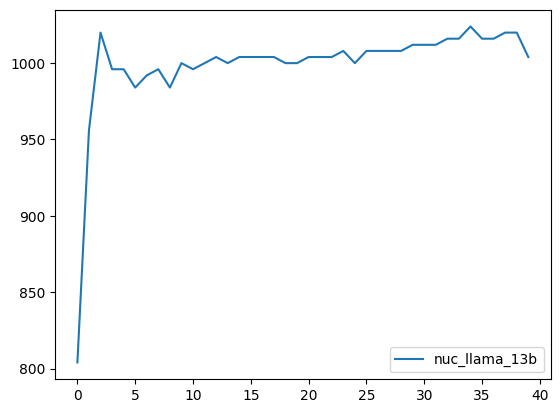

In [86]:
plt.plot(nuc,label ='nuc_llama_13b')
plt.legend()
plt.show()

In [56]:
print(torch.argsort(torch.tensor(std_13b)))
print(torch.argsort(torch.tensor(sum_13b)))
print(torch.argsort(torch.tensor(std_7b)))
print(torch.argsort(torch.tensor(sum_7b)))

tensor([ 0,  1,  5,  8,  6,  7, 10, 20, 25, 24, 22, 21, 19, 18, 17, 16, 14, 13,
        12, 11,  9,  4, 15,  3, 28, 27, 26, 23, 29, 30, 31, 32, 33, 35, 36, 37,
        39, 34, 38,  2])
tensor([ 0,  1,  5,  6,  8,  3,  4, 11, 10,  9,  7,  2, 12, 13, 14, 15, 18, 19,
        20, 25, 24, 22, 21, 17, 16, 23, 39, 30, 28, 27, 26, 29, 31, 32, 35, 36,
        37, 38, 33, 34])
tensor([ 0,  9,  8, 10,  1,  5,  7, 12, 13,  6,  3, 14, 15, 18, 16, 19, 17, 11,
         4, 21, 20, 22, 23, 24, 25, 26, 27, 28,  2, 29, 30, 31])
tensor([ 0,  1,  9,  8,  5, 10,  3,  4,  7, 12,  6, 13, 14, 15, 11,  2, 17, 18,
        16, 19, 21, 20, 23, 22, 24, 25, 26, 28, 27, 30, 29, 31])


In [64]:
print(torch.argsort(torch.tensor(l2_13b)))

tensor([ 0,  1,  5,  6,  8,  9, 13, 11, 10,  7,  4,  3, 20, 24, 23, 22, 21, 25,
        19, 17, 16, 15, 14, 12, 18, 29, 28, 27, 26, 30, 31, 32,  2, 33, 34, 35,
        36, 37, 38, 39])


In [82]:
print(torch.argsort(torch.tensor(nuc)))

tensor([ 0,  1,  5,  8,  6,  3,  4,  7, 10, 18, 19, 13, 24, 11,  9, 22, 21, 20,
        39, 16, 15, 14, 12, 17, 23, 25, 26, 27, 28, 29, 31, 30, 32, 33, 35, 36,
        37, 38,  2, 34])


In [84]:
nuc

[tensor(804., dtype=torch.bfloat16),
 tensor(956., dtype=torch.bfloat16),
 tensor(1020., dtype=torch.bfloat16),
 tensor(996., dtype=torch.bfloat16),
 tensor(996., dtype=torch.bfloat16),
 tensor(984., dtype=torch.bfloat16),
 tensor(992., dtype=torch.bfloat16),
 tensor(996., dtype=torch.bfloat16),
 tensor(984., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(996., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1004., dtype=torch.bfloat16),
 tensor(1008., dtype=torch.bfloat16),
 tensor(1000., dtype=torch.bfloat16),
 tensor(1008., dtype=torch.bfloat16),
 tensor(1008., dtype=